# Package imports

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

import L_layer_nn as lnn

# Dataset Import and Manipulation

Dataset chosen for analysis is [covtype](https://archive.ics.uci.edu/ml/datasets/covertype) dataset which defines 7 types of forest cover types each labeled a number from the set {1,2,3,4,5,6,7}.

The dataset contains _581,012_ observations from which: 
- first _11,340_ records used for training data subset
- next _3,780_ records used for validation data subset
- last _565,892_ records used for testing data subset

The dataset has 12 measures, but 54 columns of data (10 quantitative variables, 4 binary wilderness areas and 40 binary soil type variables)

|Name                                     |Data Type    |Measurement                       |Description|
|---|---|---|---|
|Elevation|quantitative|meters|Elevation in meters|
|Aspect|quantitative|azimuth|Aspect in degrees azimuth|
|Slope|quantitative|degrees|Slope in degrees|
|Horizontal_Distance_To_Hydrology        |quantitative    |meters                       |Horz Dist to nearest surface water features|
|Vertical_Distance_To_Hydrology          |quantitative    |meters                       |Vert Dist to nearest surface water features|
|Horizontal_Distance_To_Roadways         |quantitative    |meters                       |Horz Dist to nearest roadway|
|Hillshade_9am                           |quantitative    |0 to 255 index               |Hillshade index at 9am, summer solstice|
|Hillshade_Noon                          |quantitative    |0 to 255 index               |Hillshade index at noon, summer soltice|
|Hillshade_3pm                           |quantitative    |0 to 255 index               |Hillshade index at 3pm, summer solstice|
|Horizontal_Distance_To_Fire_Points      |quantitative    |meters                       |Horz Dist to nearest wildfire ignition points|
|Wilderness_Area (4 binary columns)      |qualitative     |0 (absence) or 1 (presence)  |Wilderness area designation|
|Soil_Type (40 binary columns)           |qualitative     |0 (absence) or 1 (presence)  |Soil Type designation|
|Cover_Type (7 types)                    |integer         |1 to 7                       |Forest Cover Type designation|

### Importing Dataset
Import the dataset from the file `covtype.data`.

If you don't have the dataset run the following commands and also replace the `pd.read_csv` command

>```python
!wget archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
dataset = pd.read_csv("covtype.data.gz", compression = "gzip")
```

In [2]:
from sklearn.datasets import fetch_covtype
dataset = pd.read_csv("covtype.data")

In [3]:
dataset.head()

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


### Extract the labels from the dataset

There are 7 unique values of Cover_type in the dataset which determines the forest cover type.

It is the last column in the dataset with column name `'5'`

In [4]:
# Unique labels by frequency
dataset['5'].value_counts().sort_values()

4      2747
5      9492
6     17367
7     20510
3     35754
1    211840
2    283301
Name: 5, dtype: int64

In [5]:
y = dataset.pop('5')

### Normalize the Dataset

The dataset needs to be normalized before feeding it into any machine learning algorithm.

>The normalization method used is __min-max normalization__. `MinMaxScaler` function is used from 
the sklearn library.

It automatically handles the case of _divide by zero_ when then min and the
max in any data-column are the same.

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset))

In [7]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.360180,0.366667,0.090909,0.214746,0.204134,0.009414,0.905512,0.933071,0.551181,0.840792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train and Test Split

The dataset contains 581,012 observations from which:

+ first 11,340 records used for training data subset
+ next 3,780 records used for testing data subset

In [8]:
X_train = dataset.iloc[0:11340,:]
y_train = y.iloc[0:11340]
X_test = dataset.iloc[11341:15121,:]
y_test = y.iloc[11341:15121]

print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('The shape of X_train is: ' + str(X_test.shape))
print ('The shape of y_train is: ' + str(y_test.shape))

The shape of X_train is: (11340, 54)
The shape of y_train is: (11340,)
The shape of X_train is: (3780, 54)
The shape of y_train is: (3780,)


# Classification using Logistic Regression

`LogisticRegression` in sklearn has by default the value for `multi_class` attribute set to `ovr`.

This just means that the classifier generated uses by Defalut One-vs-Rest logistic regression (OVR) in which <br>
a separate model is trained for each class predicted whether an observation is that class or not (thus making it <br>
a binary classification problem). It assumes that each classification problem (e.g. class 0 or not) is independent.

In [9]:
from sklearn.linear_model import LogisticRegression

# Fit the classifier on training data
classifier = LogisticRegression().fit(X_train, y_train)

print(classifier)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [10]:
# Calculate the accuracy on test data
acc_lr_train = classifier.score(X_train, y_train)

# Calculate the accuracy on test data
acc_lr_test = classifier.score(X_test, y_test)

print(f'Accuracy on Train data = {acc_lr_train * 100}')
print(f'Accuracy on Test data = {acc_lr_test * 100}')

Accuracy on Train data = 66.37566137566138
Accuracy on Test data = 67.4074074074074


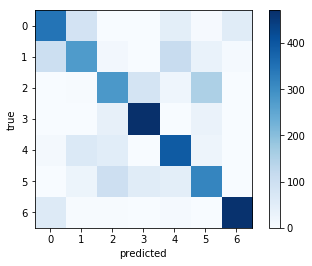

In [11]:
from sklearn.metrics import confusion_matrix 

lr_predictions = classifier.predict(X_test)

cm = confusion_matrix(y_test, lr_predictions) 

plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

# Classification using Support Vector Machines

In [12]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 

print(svm_model_linear)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [13]:
# Calculate the accuracy on test data
acc_lr_train = svm_model_linear.score(X_train, y_train)

# Calculate the accuracy on test data
acc_lr_test = svm_model_linear.score(X_test, y_test)

print(f'Accuracy on Train data = {acc_lr_train * 100}')
print(f'Accuracy on Test data = {acc_lr_test * 100}')

Accuracy on Train data = 69.94708994708995
Accuracy on Test data = 71.26984126984127


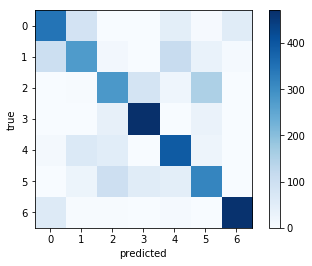

In [14]:
svm_predictions = classifier.predict(X_test)

cm = confusion_matrix(y_test, svm_predictions) 

plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

## Analysis

Accuracy scores from above two classifications show that our models have very high bias.<br>
To rectify that what we can do is exploratory data analysis. While that is a good option,<br>
it is a lengthy process and requires a fundamental understanding of the dataset.

What we can do is use a deep neural network to analyze it further.

# 2-layer Neural Network

## Reshape data for Neural Network

In [15]:
X_train = X_train.values
X_train = X_train.T
X_test = X_test.values
X_test = X_test.T

y_train = y_train.values
y_train = y_train.reshape(y_train.shape[0],1)
y_train = y_train.T

y_test = y_test.values
y_test = y_test.reshape(y_test.shape[0],1)
y_test = y_test.T

print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('The shape of X_test is: ' + str(X_test.shape))
print ('The shape of y_test is: ' + str(y_test.shape))

The shape of X_train is: (54, 11340)
The shape of y_train is: (1, 11340)
The shape of X_test is: (54, 3780)
The shape of y_test is: (1, 3780)


## One-Hot Encoding the labels

In [16]:
def oneHotEncoding(data, nb_classes):
    #targets = np.array(data).reshape(-1)
    data = data - 1
    return np.eye(nb_classes)[data]

In [17]:
temp = oneHotEncoding(y_train, 7)
temp = temp[0, :, :]
y_train_single = y_train
y_train = temp.T
print(y_train.shape)

temp = oneHotEncoding(y_test, 7)
temp = temp[0, :, :]
y_test_single = y_test
y_test = temp.T
print(y_test.shape)

(7, 11340)
(7, 3780)


# Training

Cost after iteration 100: 4.681843
Cost after iteration 200: 1.806372
Cost after iteration 300: 1.584562
Cost after iteration 400: 1.560319
Cost after iteration 500: 1.484558
Cost after iteration 600: 1.388990
Cost after iteration 700: 1.395138
Cost after iteration 800: 1.337093
Cost after iteration 900: 1.314223
Cost after iteration 1000: 1.323225
Cost after iteration 1100: 1.250309
Cost after iteration 1200: 1.314965
Cost after iteration 1300: 1.260756
Cost after iteration 1400: 1.272822
Cost after iteration 1500: 1.247831
Cost after iteration 1600: 1.247774
Cost after iteration 1700: 1.244352
Cost after iteration 1800: 1.191837
Cost after iteration 1900: 1.188592
Cost after iteration 2000: 1.228667
Cost after iteration 2100: 1.182293
Cost after iteration 2200: 1.189142
Cost after iteration 2300: 1.176286
Cost after iteration 2400: 1.100950
Cost after iteration 2500: 1.172504
Cost after iteration 2600: 1.144521
Cost after iteration 2700: 1.095018
Cost after iteration 2800: 1.127667
C

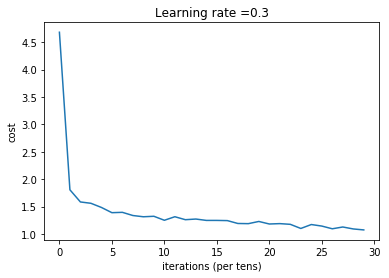

In [18]:
#Dimensions of each layer in our network
layer_dims = [X_train.shape[0],20,20,10,y_train.shape[0]]
activation_functions = ["relu","relu","relu","sigmoid"]
alpha = 0.3
parameters = lnn.L_layer_model(X_train, y_train, layer_dims, activation_functions, learning_rate = alpha, num_iterations = 3000, print_cost=True, print_plot =  True)

# Predictions and Accuracy

In [19]:
activations = ["relu","relu","relu","sigmoid"]
predictions = lnn.predict(parameters, X_test, activations)
match_bool = np.equal(predictions,y_test_single).astype('int')
accuracy = float(np.count_nonzero(match_bool == 1)) / float(y_test_single.size) * 100
print(f'Accuracy: {round(accuracy,2)}%')

Accuracy: 71.01%


In [20]:
activations = ["tanh","tanh","sigmoid"]
layer_dims = [X_train.shape[0],20,10,y_train.shape[0]]
parameters = lnn.L_layer_model(X_train, y_train, layer_dims, activation_functions, learning_rate = alpha, num_iterations = 3000)
predictions = lnn.predict(parameters, X_test, activations)
match_bool = np.equal(predictions,y_test_single).astype('int')
accuracy = float(np.count_nonzero(match_bool == 1)) / float(y_test_single.size) * 100
print(f'Accuracy: {round(accuracy,2)}%')

/home/chrx/Documents/DUCS/multi_layer_nn/L_layer_nn.py:251: RuntimeWarning: divide by zero encountered in true_divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
/home/chrx/Documents/DUCS/multi_layer_nn/L_layer_nn.py:251: RuntimeWarning: invalid value encountered in true_divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
/home/chrx/Documents/DUCS/multi_layer_nn/L_layer_nn.py:153: RuntimeWarning: invalid value encountered in log
  cost =  (-1./m) * np.sum(np.multiply(np.log(AL+epsilon),Y) + np.multiply(np.log(1-AL+epsilon),1-Y))


Accuracy: 14.29%


In [21]:
activations = ["relu","tanh","sigmoid"]
parameters = lnn.L_layer_model(X_train, y_train, layer_dims, activation_functions, learning_rate = alpha, num_iterations = 3000)
predictions = lnn.predict(parameters, X_test, activations)
match_bool = np.equal(predictions,y_test_single).astype('int')
accuracy = float(np.count_nonzero(match_bool == 1)) / float(y_test_single.size) * 100
print(f'Accuracy: {round(accuracy,2)}%')

/home/chrx/Documents/DUCS/multi_layer_nn/L_layer_nn.py:251: RuntimeWarning: divide by zero encountered in true_divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
/home/chrx/Documents/DUCS/multi_layer_nn/L_layer_nn.py:251: RuntimeWarning: invalid value encountered in true_divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
/home/chrx/Documents/DUCS/multi_layer_nn/L_layer_nn.py:153: RuntimeWarning: invalid value encountered in log
  cost =  (-1./m) * np.sum(np.multiply(np.log(AL+epsilon),Y) + np.multiply(np.log(1-AL+epsilon),1-Y))


Accuracy: 14.29%


/home/chrx/Documents/DUCS/multi_layer_nn/activation_utils.py:53: RuntimeWarning: invalid value encountered in true_divide
  A = (np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))


In [22]:
activations = ["tanh","relu","sigmoid"]
parameters = lnn.L_layer_model(X_train, y_train, layer_dims, activation_functions, learning_rate = alpha, num_iterations = 3000)
predictions = lnn.predict(parameters, X_test, activations)
match_bool = np.equal(predictions,y_test_single).astype('int')
accuracy = float(np.count_nonzero(match_bool == 1)) / float(y_test_single.size) * 100
print(f'Accuracy: {round(accuracy,2)}%')

/home/chrx/Documents/DUCS/multi_layer_nn/L_layer_nn.py:251: RuntimeWarning: divide by zero encountered in true_divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
/home/chrx/Documents/DUCS/multi_layer_nn/L_layer_nn.py:251: RuntimeWarning: invalid value encountered in true_divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
/home/chrx/Documents/DUCS/multi_layer_nn/L_layer_nn.py:153: RuntimeWarning: invalid value encountered in log
  cost =  (-1./m) * np.sum(np.multiply(np.log(AL+epsilon),Y) + np.multiply(np.log(1-AL+epsilon),1-Y))


Accuracy: 14.29%
